In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
sns.set() # if you want to use seaborn themes with matplotlib functions.

In [48]:
np.random.randn(5)

array([ 0.19253978, -0.6217474 , -0.15152319,  0.34940045, -0.69788821])

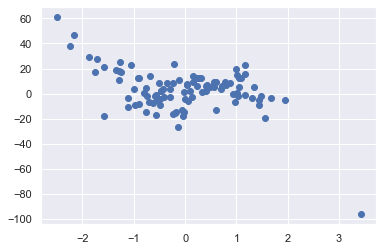

In [49]:
np.random.seed(102)
x = np.random.randn(100)
y = x + 2 * (x ** 2) -3 * (x ** 3) + 5*np.random.normal(0, 2, 100)
plt.scatter(x, y)
plt.show()

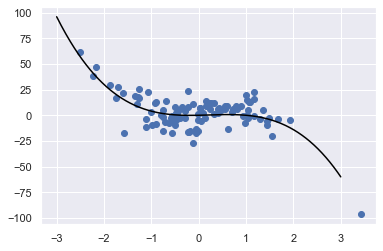

In [50]:
plt.scatter(x, y)
# let's add the unobservable true model
w = np.linspace(-3, 3, 500)
z = w + 2 * (w ** 2) - 3 * (w ** 3)
plt.plot(w, z, c="black")
plt.show()

##### Polynomial Transformation of the Data

In [51]:
poly = PolynomialFeatures(degree=10)

In [52]:
x[0:5]

array([ 1.6680683 ,  0.92586182,  1.05799677, -0.92033901,  1.29974847])

In [53]:
x.reshape(-1, 1)[0:5]
# this is equivalent to x.reshape(100, 1)[0:5]

array([[ 1.6680683 ],
       [ 0.92586182],
       [ 1.05799677],
       [-0.92033901],
       [ 1.29974847]])

In [54]:
X_poly = pd.DataFrame(poly.fit_transform(x.reshape(-1, 1)))
X_poly.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.668068,2.782452,4.641320,7.742038,12.914249,21.541849,35.933275,59.939156,99.982606,166.777815
1,1.0,0.925862,0.857220,0.793667,0.734826,0.680348,0.629908,0.583208,0.539970,0.499937,0.462873
2,1.0,1.057997,1.119357,1.184276,1.252960,1.325628,1.402510,1.483851,1.569910,1.660960,1.757290
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297,0.607697,-0.559287,0.514734,-0.473730,0.435992
4,1.0,1.299748,1.689346,2.195725,2.853890,3.709339,4.821208,6.266358,8.144689,10.586047,13.759198


##### Splitting the Data

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=100)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_hat_te = model.predict(X_test)

In [58]:
df_predictions = pd.DataFrame({"y_test": y_test, "y_hat_test": y_hat_te, "resid": y_test - y_hat_te})
df_predictions.head()

,y_test,y_hat_test,resid
0,-5.403786,-3.474959,-1.928826
1,-14.957215,-1.383075,-13.574140
2,61.375324,-151.901283,213.276607
3,-17.744152,20.013897,-37.758048
4,-15.849248,-1.603973,-14.245275


##### Plotting the Train Data Regression Function

In [59]:
y_hat_tr = model.predict(X_train)
type(y_hat_te)

numpy.ndarray

In [60]:
np.c_[X_train[1], y_hat_tr][:5]

array([[ 0.99718968,  7.46927188],
       [-0.50984497, -3.10530288],
       [-0.92033901,  2.83423479],
       [-0.48492775, -3.1088848 ],
       [-0.79430004, -0.20982046]])

In [61]:
prediction_tr = pd.DataFrame(np.c_[X_train[1], y_hat_tr], columns=["x", "y_hat_tr"])
prediction_tr.head()

,x,y_hat_tr
0,0.997190,7.469272
1,-0.509845,-3.105303
2,-0.920339,2.834235
3,-0.484928,-3.108885
4,-0.794300,-0.209820


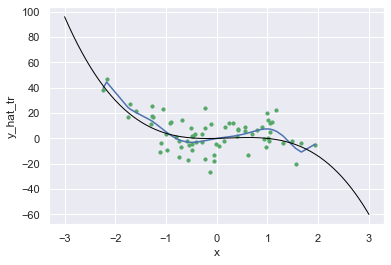

In [62]:
# plotting the fitted line vs true(unobservable) line
sns.lineplot(x="x", y="y_hat_tr", data=prediction_tr)
plt.scatter(X_train[1], y_train, s=10, c="g")
plt.plot(w, z, c="black", linewidth=1)
plt.show()

##### Comparing the MSE_train and MSE_test

In [63]:
err_tr = y_train - y_hat_tr
MSE_train = np.mean(np.square(err_tr))
round(MSE_train, 2)

94.8

In [64]:
err_te = y_test - y_hat_te
MSE_test = np.mean(np.square(err_te))
round(MSE_test, 2)

74376445.0

##### All in one Function

In [65]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def my_polynomial_regression(poly_degree, X, y, test_size = 0.3, rand_state = 100):
    poly_features = PolynomialFeatures(degree = poly_degree)
    
    # transforms the existing features to higher degree features
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1 ,1)))
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)
    
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
    
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
    
    # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)), 2)
    RMSE_train = round(np.sqrt(MSE_train), 2)
    
    # evaluatinn the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)), 2)
    RMSE_test = round(np.sqrt(MSE_test), 2)
    
    return poly_degree, RMSE_train, RMSE_test

In [66]:
my_polynomial_regression(poly_degree=5, X=x, y=y)

(5, 9.94, 44.58)

In [67]:
my_polynomial_regression(poly_degree=1, X=x, y=y)

(1, 12.65, 20.74)

In [68]:
returns = []
for i in range(1, 6):
    returns.append(my_polynomial_regression(poly_degree=i, X=x, y=y))
    
output = pd.DataFrame(returns, columns=["Degree", "RMSE_train", "RMSE_test"])
output

,Degree,RMSE_train,RMSE_test
0,1,12.65,20.74
1,2,11.32,29.15
2,3,10.24,10.20
3,4,10.06,33.45
4,5,9.94,44.58


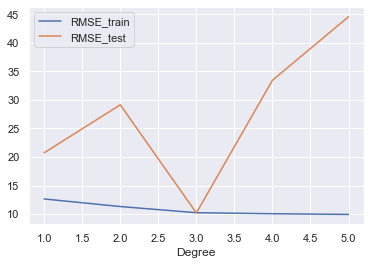

In [69]:
output.set_index("Degree").plot()
plt.show()

In [70]:
# the optimal poly degree is 3. Because of the lowest RMSE_test point.
# If we don't have the labeled set we will estimate it by cross validation.

### Finding the Optimal Polynomial Degree : Elbow Method
##### Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [72]:
model = LinearRegression()

In [73]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
32,1.0,0.997190,0.994387,0.991593,0.988806,0.986027,0.983256,0.980493,0.977737,0.974990,0.972250
6,1.0,-0.509845,0.259942,-0.132530,0.067570,-0.034450,0.017564,-0.008955,0.004566,-0.002328,0.001187
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297,0.607697,-0.559287,0.514734,-0.473730,0.435992
12,1.0,-0.484928,0.235155,-0.114033,0.055298,-0.026815,0.013004,-0.006306,0.003058,-0.001483,0.000719
51,1.0,-0.794300,0.630913,-0.501134,0.398051,-0.316172,0.251135,-0.199477,0.158444,-0.125852,0.099965


In [74]:
NMSE = cross_val_score(estimator=model, X=X_train, y = y_train, cv= 10, scoring="neg_mean_squared_error")
# cv is the number of Folds. To speed up the process you can set the n_jobs = -1
# to see the list of valid scorings try: sorted(sklear.metrics.SCORERS.keys())

##### Exercise:
    Why do you think the scoring  is "negative MSE" instead of "MSE"

In [75]:
NMSE

array([ -126.51144226,   -93.96411026, -4984.41572321,  -144.08607987,
         -88.40811262,  -262.42036324,  -127.90852954,  -656.86177498,
         -61.52302379,  -207.62849473])

In [76]:
MSE_CV = np.mean(-NMSE)
MSE_CV

675.3727654504204

In [77]:
RMSE_CV = np.sqrt(-NMSE).mean()
RMSE_CV

18.833913388635672

##### Exercise : Plot the test MSE using 5-fold cross validation

In [79]:
RMSE_CV = []
iterator = range(1, 8) # the second number is polynomial degree
for i in iterator:
    X_train, X_test, y_train, y_test = \
    train_test_split(PolynomialFeatures(degree=i).fit_transform(x.reshape(-1, 1)), y, test_size=0.3, random_state=100)
    MSE = -cross_val_score(estimator= model, X = X_train, y = y_train, cv = 5, scoring="neg_mean_squared_error")
    RMSE_CV.append(np.sqrt(MSE).mean())

output = pd.DataFrame(list(iterator), columns=["Poly degree"])
output["RMSE_CV"] = RMSE_CV
output

,Poly degree,RMSE_CV
0,1,13.312919
1,2,12.571895
2,3,10.864611
3,4,11.489488
4,5,10.532328
5,6,10.554299
6,7,14.307515


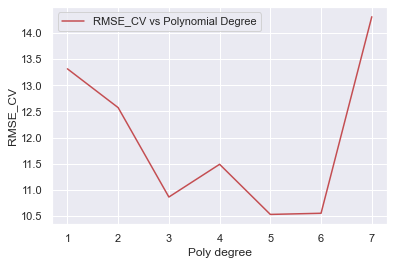

In [80]:
sns.lineplot(x = "Poly degree", y = "RMSE_CV", data = output, color = "r", label = "RMSE_CV vs Polynomial Degree")
plt.show()

In [ ]:
# Cross validation' a göre bizim en uygun degree'miz 5. 
# Ancak biz daha önce 3 bulmuştuk. Eğer elimizde label olmazsa cross validation kullanabiliriz.
# Çünkü degree olarak çok fark yok 3 ve 5 birbirine yakın değerler.